In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import math
import sys
import time

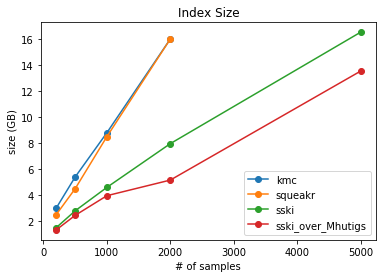

In [28]:
kmc=[3, 5.4, 8.8, 16]
squeakr=[2.5, 4.5, 8.5, 16]
sski=[1.5, 2.8, 4.6, 7.96, 16.52]
sskiOverMhutig=[1.33, 2.45, 3.96, 5.16, 13.53]
plt.plot([200, 500, 1000, 2000], kmc, '-o')
plt.plot([200, 500, 1000, 2000], squeakr, '-o')
plt.plot([200, 500, 1000, 2000, 5000], sski, '-o')
plt.plot([200, 500, 1000, 2000, 5000], sskiOverMhutig, '-o')
plt.title("Index Size")
plt.ylabel('size (GB)')
plt.xlabel('# of samples')
plt.legend(['kmc', 'squeakr', 'sski', 'sski_over_Mhutigs'])

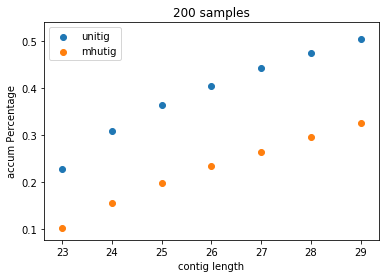

In [17]:
totalContigs=67683501
d200 = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/tmp200", sep=" ", header=None)
d200.columns = ['count', 'length']
limited=d200[d200['length'] < 30]
limited = limited.sort_values('length', ascending=True)
limited['accumCount']=limited['count'].cumsum()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)

totalContigs=38488007
nd200 = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/indices/nobbb_mantis_0_2k_k23.idx/cnt_mhutig.out", sep=" ", header=None)
nd200.columns = ['count', 'length']
limited=nd200[nd200['length'] < 30]
limited = limited.sort_values('length', ascending=True)
limited['accumCount']=limited['count'].cumsum()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)

plt.title('200 samples')
plt.ylabel('accum Percentage')
plt.xlabel('contig length')
plt.legend(['unitig', 'mhutig'])

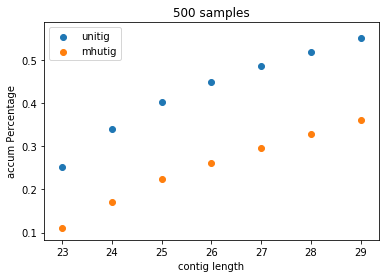

In [16]:
totalContigs=139749164
d500 = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/tmp500", sep=" ", header=None)
d500.columns = ['count', 'length']
limited=d500[d500['length'] < 30]
limited = limited.sort_values('length', ascending=True)
limited['accumCount']=limited['count'].cumsum()
limited.head()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)

totalContigs=77185325
nd200 = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/indices/nobbb_mantis_0_5k_k23.idx/cnt_mhutig.out", sep=" ", header=None)
nd200.columns = ['count', 'length']
limited=nd200[nd200['length'] < 30]
limited = limited.sort_values('length', ascending=True)
limited['accumCount']=limited['count'].cumsum()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)

plt.title('500 samples')
plt.ylabel('accum Percentage')
plt.xlabel('contig length')
plt.legend(['unitig', 'mhutig'])

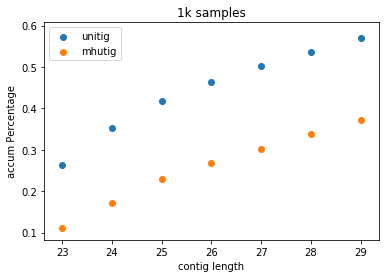

In [15]:
totalContigs=244077866
d1k = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/tmp1k", sep=" ", header=None)
d1k.columns = ['count', 'length']
limited=d1k[d1k['length'] < 30]
limited = limited.sort_values('length', ascending=True)
limited['accumCount']=limited['count'].cumsum()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)

totalContigs=131171855
nd200 = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/indices/nobbb_mantis_1k_k23.idx/cnt_mhutig.out", sep=" ", header=None)
nd200.columns = ['count', 'length']
limited=nd200[nd200['length'] < 30]
limited = limited.sort_values('length', ascending=True)
limited['accumCount']=limited['count'].cumsum()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)

plt.title('1k samples')
plt.ylabel('accum Percentage')
plt.xlabel('contig length')
plt.legend(['unitig', 'mhutig'])

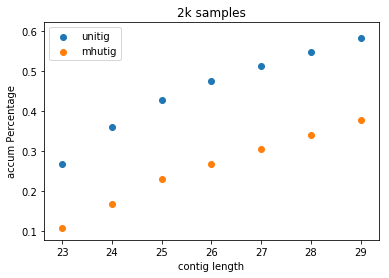

In [22]:
totalContigs=436274203
d2k = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/tmp2k", sep=" ", header=None)
d2k.columns = ['count', 'length']
limited=d2k[d2k['length'] < 30]
limited = limited.sort_values('count', ascending=False)
limited['accumCount']=limited['count'].cumsum()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)

totalContigs=229401504
nd200 = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/indices/nobbb_mantis_2k_k23.idx/cnt_mhutig.out", sep=" ", header=None)
nd200.columns = ['count', 'length']
limited=nd200[nd200['length'] < 30]
limited = limited.sort_values('length', ascending=True)
limited['accumCount']=limited['count'].cumsum()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)

plt.title('2k samples')
plt.ylabel('accum Percentage')
plt.xlabel('contig length')
plt.legend(['unitig', 'mhutig'])

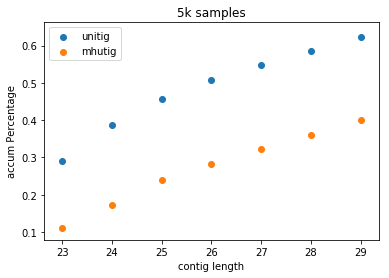

In [29]:
totalContigs=985528081
d5k = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/tmp5k", sep=" ", header=None)
d5k.columns = ['count', 'length']
limited=d5k[d5k['length'] < 30]
limited = limited.sort_values('length', ascending=True)
limited['accumCount']=limited['count'].cumsum()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)


totalContigs=492119574
nd200 = pd.read_csv("/mnt/scratch1/fatemeh/mantis-recomb/indices/nobbb_mantis_5k_k23.idx/cnt_mhutig.out", sep=" ", header=None)
nd200.columns = ['count', 'length']
limited=nd200[nd200['length'] < 30]
limited = limited.sort_values('length', ascending=True)
limited['accumCount']=limited['count'].cumsum()
plt.scatter(limited['length'], limited['accumCount']/totalContigs)

plt.title('5k samples')
plt.ylabel('accum Percentage')
plt.xlabel('contig length')
plt.legend(['unitig', 'mhutig'])

## Hierarchical KMC merge

In [115]:
def runKMCMerge(input_list):
    bashCommand = "/usr/bin/time /home/fatemeh/others_projects/KMC/bin/kmc_tools complex {}".format(input_list)
    proc = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    logfile=open("{}.log".format(input_list), "w")
    for line in proc.stdout:
    #     sys.stdout.write(line)
        logfile.write(line.decode('utf-8'))
    proc.wait()
    logfile.close()
    # output, error = process.communicate()

In [126]:
f = open("/mnt/scratch1/fatemeh/kmc/input_lists/nobbb_1k_kmc", "r")
samples=1000

level=0
bucketSize=20
o = open("/mnt/scratch1/fatemeh/kmc/input_lists/tmp/d{}_{}.lst".format(samples, level), "w")
for line in f:
    o.write(line)
f.close()
o.close()

pstart = time.time()

n=0
cnt=samples

In [127]:
while n != 1:
    n=math.ceil(cnt/bucketSize)
    inputlist = open("/mnt/scratch1/fatemeh/kmc/input_lists/tmp/d{}_{}.lst".format(samples, level))
    outputlist = open("/mnt/scratch1/fatemeh/kmc/input_lists/tmp/d{}_{}.lst".format(samples, level+1), "w")
    print("level:{},count:{},runs:{}".format(level, cnt, n))
    for i in range(n):
        index= "/mnt/scratch1/fatemeh/kmc/indices/tmp/d{}_{}_{}/kmc".format(samples, level, i)
        kmcMerge_fileName = "/mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d{}_{}_{}".format(samples,level,i)
        o = open(kmcMerge_fileName, "w")
        o.write("INPUT:\n")
        outstr = "{} = ".format(index)
        outputlist.write("{}\n".format(index))
        for cntr in range(bucketSize):
            l = inputlist.readline()
            if l == '': # eof
                break
            o.write("set{} = {}\n".format(cntr, l.strip()))
            outstr += "set{} + min ".format(cntr)
            cntr+=1
        o.write("OUTPUT:\n")
        o.write(outstr[:-7])
        o.close()
        cstart = time.time()
#         print("got to this point")
        bashCommand="mkdir -p /mnt/scratch1/fatemeh/kmc/indices/tmp/d{}_{}_{}".format(samples, level, i)
        proc = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        output, error = proc.communicate()
        runKMCMerge(kmcMerge_fileName)
        cend = time.time()
        print("{}:{} - {} - {} secs".format(level, i, kmcMerge_fileName, int(cend-cstart)))
    outputlist.close()
    inputlist.close()
    cnt=n
    level+=1
pend = time.time()
print("total time: {} secs".format(int(pend-pstart)))

level:0,count:1000,runs:50
0:0 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_0 - 14 secs
0:1 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_1 - 9 secs
0:2 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_2 - 11 secs
0:3 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_3 - 7 secs
0:4 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_4 - 18 secs
0:5 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_5 - 10 secs
0:6 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_6 - 8 secs
0:7 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_7 - 11 secs
0:8 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_8 - 9 secs
0:9 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_9 - 22 secs
0:10 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_10 - 20 secs
0:11 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_11 - 13 secs
0:12 - /mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d1000_0_12 - 8 secs
0:13 - /mn

In [125]:
# faileds
failed_fileName="/mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d2000_2_0"
# failed_fileName="/mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d500_0_18"
# failed_fileName="/mnt/scratch1/fatemeh/kmc/input_lists/tmp/input_d500_0_24"
runKMCMerge(failed_fileName)